# 2.2.2. Hồi qui Ridge

## 2.2.2.1. Tính tổng quát của mô hình

Một mục tiêu tiên quyết để có thể áp dụng được mô hình vào thực tiến đó là chúng ta cần giảm thiểu hiện tượng _quá khớp_. Để thực hiện được mục tiêu đó, mô hình được huấn luyện được kì vọng sẽ nắm bắt được **qui luật tổng quát** từ _tập huấn luyện_ (_train dataset_) mà qui luật đó phải đúng trên những dữ liệu mới mà nó chưa được học. Thông thường tập dữ liệu mới đó được gọi là _tập kiểm tra_ (_test dataset_). Đây là một tập dữ liệu độc lập được sử dụng để đánh giá mô hình.

## 2.2.2.2. Bài toán hồi qui tuyến tính

Giả định dữ liệu đầu vào bao gồm $N$ quan sát là những cặp các biến đầu vào và biến mục tiêu $(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_N, y_N)$. Quá trình hồi qui mô hình sẽ tìm kiếm một véc tơ hệ số ước lượng $\mathbf{w} = [w_0, w_1, \dots, w_p]$ sao cho tối thiểu hoá _hàm mất mát_ dạng MSE:

$$\mathcal{L}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \mathbf{w}^{\intercal}\mathbf{x}_i) = \frac{1}{N}||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2}$$

Giá trị hàm mất mát chính là trung bình của tổng bình phương phần dư. Phần dư chính là chênh lệch giữa giá trị thực tế và giá trị dự báo. Tối thiểu hoá hàm mất mát có nghĩa là làm cho giá trị dự báo sát nhất với thực tế. Trước khi huấn luyện mô hình chúng ta chưa thực sự biết véc tơ hệ số $\mathbf{w}$ là gì. Chúng ta chỉ có thể đặt ra một giả thuyết về các hệ số hồi qui mô hình. Chính vì vậy mục đích của tối thiểu hoá hàm mất mát là để tìm ra tham số $\mathbf{w}$ phù hợp nhất dựa trên quan hệ dữ liệu giữa biến đầu vào $\mathbf{X}$ với biến mục tiêu $\mathbf{y}$ trên tập huấn luyện.

Tuy nhiên mối quan hệ này nhiều khi không mô tả được qui luật khái quát của dữ liệu nên dẫn tới hiện tượng _quá khớp_. Một trong những nguyên nhân dẫn tới sự không khái quát của mô hình đó là do mô hình quá phức tạp. Độ lớn của hệ số  các mô hình chính là một trong những nguyên nhân ảnh hưởng tới sự phức tạp của mô hình biểu diễn như phân tích trong hình bên dưới:

![](https://i.imgur.com/0jjTcCn.jpeg)

**Hình 1:** Hình thể hiện mức độ phức tạp của mô hình theo sự thay đổi của bậc phương trình. Phương trình có độ phức tạp lớn nhất là phương trình bậc 3: $y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$. Trong chương trình THPT chúng ta biết rằng phương trình bậc 3 thông thường sẽ có 2 điểm uốn và độ phức tạp lớn hơn bậc hai chỉ có 1 điểm uốn. Khi $x_3 \rightarrow 0$ thì phương trình bậc 3 hội tụ về phương trình bậc 2: $y = w_0 + w_1 x_1 + w_2 x_2$, lúc này độ phức tạp của phương trình giảm. Tiếp tục kiểm soát độ lớn để $w_2 \rightarrow 0$ trong phương trình bậc 2 ta sẽ thu được một đường thẳng tuyến tính $y = w_0 + w_1 x_1$ là dạng phương trình đơn giản nhất.

Như vậy kiểm soát độ lớn của hệ số ước lượng sẽ giúp giảm bớt mức độ phức tạp của mô hình và thông qua đó khắc phục hiện tượng _quá khớp_. Vậy làm cách nào để kiểm soát chúng, cùng tìm hiểu chương bên dưới.

## 2.2.2.3. Sự thay đổi trong hồi qui Ridge

Hàm mất mát trong hồi qui Ridge sẽ có sự thay đổi so với hồi qui tuyến tính đó là _thành phần điều chuẩn_ (_regularization term_) được cộng thêm vào hàm mất mát như sau:

$$\begin{eqnarray} \mathcal{L}(\mathbf{w}) & = & \frac{1}{N}||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2} + \alpha ||\mathbf{w}||_2^2 \\
& = & \frac{1}{N}||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2} + \underbrace{\alpha R(\mathbf{w})}_{\text{regularization term}}
\end{eqnarray}$$

Trong phương trình trên thì $\alpha \geq 0$. $\frac{1}{N}||\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}||_{2}^{2}$ chính là tổng bình phương phần dư và $\alpha ||\mathbf{w}||_2^2$ đại diện cho _thành phần điều chuẩn_. 

Bài toán tối ưu hàm mất mát của hồi qui _Ridge_ về bản chất là tối ưu song song hai thành phần bao gồm tổng bình phương phần dư và _thành phần điều chuẩn_. Hệ số $\alpha$ có tác dụng điều chỉnh độ lớn của _thành phần điều chuẩn_ tác động lên hàm mất mát.

* Trường hợp $\alpha = 0$, _thành phần điều chuẩn_ bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính.

* Trường hợp $\alpha$ nhỏ thì vai trò của _thành phần điều chuẩn_ trở nên ít quan trọng. Mức độ kiểm soát _quá khớp_ của mô hình sẽ trở nên kém hơn.

* Trường hợp $\alpha$ lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng và qua đó giảm bớt hiện tượng _qúa khớp_.

Khi tăng dần hệ số $\alpha$ thì _hồi qui Ridge_ sẽ có xu hướng thu hẹp hệ số ước lượng từ mô hình. Chúng ta sẽ thấy rõ thông qua ví dụ mẫu bên dưới.

**Import thư viện và đọc dữ liệu đầu vào**

Bộ dữ liệu đầu vào được sử dụng cho ví dụ này là diabetes. Thông tin về bộ dữ liệu này bạn đọc có thể tham khảo tại [sklearn diabetes dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

Mục tiêu của mô hình là từ 10 biến đầu vào là những thông tin liên quan tới người bệnh bao gồm `age, sex, body mass index, average blood pressure` và 6 chỉ số  `blood serum`. Chúng ta sẽ dự báo biến mục tiêu là một thước đo định lượng sự tiến triển của bệnh sau 1 năm điều trị.

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

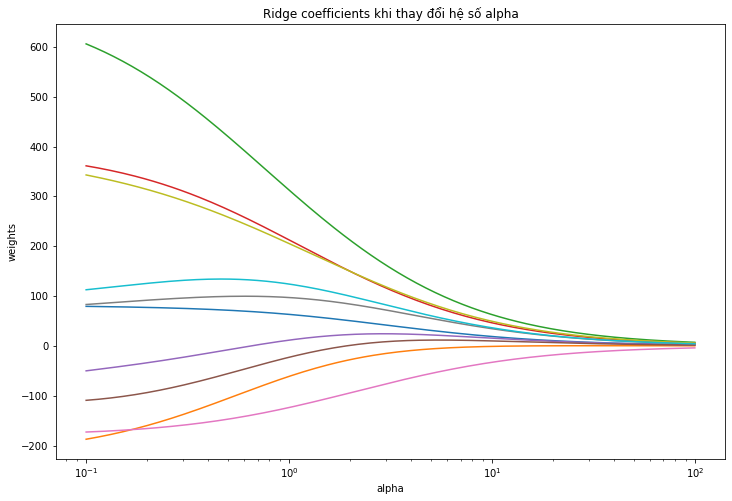

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Thay đổi alphas từ 1 --> 100
n_alphas = 200
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients khi thay đổi hệ số alpha')
plt.axis('tight')
plt.show()

Việc lựa chọn $\alpha$ như thế nào để phù hợp là một vấn đề sẽ được bàn luận kĩ hơn ở chương bên dưới.

Ngoài ra bài toán tối ưu đối với _hàm hồi qui Ridge_ tương đương với bài toán tối ưu với điều kiện ràng buộc về độ lớn của hàm mục tiêu:

$$\begin{eqnarray} \mathcal{L}(\mathbf{w}) & = & \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} \\
\text{subject } & : & \|\mathbf{w}\|_2^2 < C, C > 0
\end{eqnarray}$$

Thật vậy, để giải bài toán trên thì chúng ta có thể giải bài toán đối ngẫu trên hàm _đối ngẫu Lagrange_:

$$\begin{eqnarray}
\hat{\mathbf{w}} & = & \arg \min_{\mathbf{w}} \text{Lagrange}(\mathbf{w}, b) \\
& = & \arg \min \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} + \alpha (\|\mathbf{w}\|_2^2 - C) \\
& = & \arg \min \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} + \alpha \|\mathbf{w}\|_2^2
\end{eqnarray}$$

Trong đó $\alpha > 0$.

Như vậy bài toán _đối ngẫu_ quay trở về tối thiểu hoá hàm mất mát trong _hồi qui Ridge_.

Điều kiện ràng buộc $\| \mathbf{w} \|_2^2 < C$ cho thấy nghiệm tối ưu sẽ bị hạn chế về độ lớn. Trong không gian đa chiều thì điều kiện ràng buộc có miền xác định là một khối cầu có tâm là gốc toạ độ và bán kính $\sqrt{C}$. Đây chính là một cơ chế kiểm soát mà _thành phần điều chuẩn_ đã áp đặt lên các biến đầu vào.

## 2.2.2.4. Nghiệm tối ưu của hồi qui Ridge

Giải bài toán tối ưu _hàm mục tiêu_ của _hồi qui Ridge_ theo đạo hàm bậc nhất của véc tơ $\mathbf{w}$:

$$\begin{eqnarray}
\frac{\partial\mathcal{L}(\mathbf{w})}{\partial\mathbf{w}} & = & \frac{1}{N}\frac{\partial\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2}}{\partial\mathbf{w}} + \alpha \frac{\partial \|\mathbf{w}\|^2_2}{\partial \mathbf{w}} \\
& = & \frac{2}{N}\mathbf{\bar{X}}^{\intercal}(\mathbf{\bar{X}}\mathbf{w} - \mathbf{y}) + 2 \alpha \mathbf{w} \\
& = & \frac{2}{N} [(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}) \mathbf{w} - \bar{\mathbf{X}}^{\intercal}\mathbf{y}] \\
& = & 0
\end{eqnarray}$$

Thật vậy, từ dòng 1 suy ra dòng 2 là vì theo công thức product-rule trong matrix caculus thì:

$$\nabla_{\mathbf{w}}f({\mathbf{w}})^{\intercal}g(\mathbf{w}) = \nabla_{\mathbf{w}}(f) g + \nabla_{\mathbf{w}}(g) f$$

Khi $f=g$ thì đạo hàm trở thành:


$$\nabla_{\mathbf{w}}f({\mathbf{w}})^{\intercal}f(\mathbf{w}) = \nabla_{\mathbf{w}} \|f({\mathbf{w}})\|_2^{2} = 2\nabla_{\mathbf{w}}(f) f$$


Nếu thay  $f(\mathbf{w}) = g(\mathbf{w})= \bar{\mathbf{X}} \mathbf{w}-\mathbf{y}$ ta suy ra:

$$\begin{eqnarray}\frac{\partial\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2}}{\partial \mathbf{w}} & = & \frac{\partial(\bar{\mathbf{X}}\mathbf{w} - \mathbf{y})^{\intercal} (\bar{\mathbf{X}}\mathbf{w} - \mathbf{y})}{\partial \mathbf{w}} \\
& = & \frac{2 \partial(\bar{\mathbf{X}}\mathbf{w} - \mathbf{y})}{\partial \mathbf{w}} (\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}) \\
& = & 2\bar{\mathbf{X}}^{\intercal}(\bar{\mathbf{X}\mathbf{w}-\mathbf{y}})
\end{eqnarray}$$

Tương tự ta cũng có:

$$ \frac{\partial \|\mathbf{w}\|_2^2}{\partial \mathbf{w}} = 2\mathbf{w}$$

Như vậy ta nhận thấy dòng 1 suy ra dòng 2 là hoàn toàn đúng.

Ở dòng thứ 3 chúng ta áp dụng thêm một tính chất $\mathbf{I}\mathbf{w} = \mathbf{w}$ trong đó $\mathbf{I}$ là ma trận đơn vị.

Sau cùng nghiệm của đạo hàm bậc nhất trở thành:

$$\begin{eqnarray}\frac{2}{N} [(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}) \mathbf{w} - \bar{\mathbf{X}}^{\intercal}\mathbf{y}] & = & 0 \\
(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}) \mathbf{w} & = & \bar{\mathbf{X}}^{\intercal}\mathbf{y} \\
\mathbf{w} & = & (\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I})^{-1}\bar{\mathbf{X}}^{\intercal}\mathbf{y}
\end{eqnarray}$$

Thành phần $N\alpha \mathbf{I}$ được thêm vào trong $(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I})^{-1}$ đóng vai trò như một thành phần kiểm soát để giá trị của $\mathbf{w}$ nhỏ hơn so với ban đầu. Trên thực tế thành phần này chỉ tác động lên những phần tử thuộc đường chéo chính của ma trận và làm cho độ lớn của nghiệm giảm.

Ngoài ra ta còn chứng minh được rằng ma trận $\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}$ là một _ma trận không suy biến_ nếu $\alpha > 0$. Điều đó đảm bảo rằng mô hình _hồi qui Ridge_ luôn tìm được nghiệm. Bạn đọc quan tâm tới toán có thể thấy chứng minh này ở mục bên dưới.

## 2.2.2.5. Sự đảm bảo lời giải của hồi qui Ridge

Thật vậy, để chứng minh điều này chúng ta dựa vào hai định lý.

**Định lý 1:**

$\bar{\mathbf{X}}^{\intercal}\bar{\mathbf{X}}$ là ma trận _bán xác định dương_ (_positive semi-definite_) thì các _trị riêng_ (_eigenvalues_) của ma trận là $\mu_1, \dots, \mu_N$ là những số không âm.

**Chứng minh định lý 1:**

Đặt $\mathbf{A} = \bar{\mathbf{X}}^{\intercal}\bar{\mathbf{X}}$. Theo định nghĩa về _trị riêng_ thì khi $\lambda$ là _trị riêng_ tương ứng với _véc tơ riêng_ (_eigenvectors_) $\mathbf{w}$ của ma trận $\mathbf{A}$ vuông và bán xác định dương ta có:

$$\begin{eqnarray}
\mathbf{A}\mathbf{w} & = & \lambda \mathbf{w} \\
\leftrightarrow \bar{\mathbf{X}}^{\intercal}\bar{\mathbf{X}} \mathbf{w} & = & \lambda \mathbf{w} \\
\leftrightarrow \mathbf{w}^{\intercal} \bar{\mathbf{X}}^{\intercal}\bar{\mathbf{X}} \mathbf{w} & = &\lambda \mathbf{w}^{\intercal}\mathbf{w} \\
\leftrightarrow  \|\bar{\mathbf{X}}\mathbf{w} \|^2_{2} & = & \lambda \|\mathbf{w}\|_{2}^2
\end{eqnarray}$$

Mặt khác: $\|\bar{\mathbf{X}}\mathbf{w} \|^2_{2} \geq 0$ và $\|\mathbf{w}\|_{2}^2 \geq 0$ nên suy ra mọi _trị riêng_ (_eigenvalues_) của ma trận đều không âm.

**Định lý 2:**

Xét ma trận vuông $\mathbf{A} \in \mathbb{R}^{n \times n}$. Một _đa thức đặc trưng_ (_characteristic polynormial_) của ma trận $\mathbf{A}$ là một hàm đối với $\lambda$ có dạng $f(\lambda) = \det{(\mathbf{A}-\lambda \mathbf{I})}$. Hàm số này có nghiệm $\lambda_0$ là _trị riêng_ của ma trận $\mathbf{A}$ khi và chỉ khi $f(\lambda_0) = 0$.

**Chứng minh định lý 2:**

Khi $\lambda$ là _trị riêng_ tương ứng với _véc tơ riêng_ $\mathbf{w}$ của ma trận $\mathbf{A}$ thì:

$$\begin{eqnarray}
\mathbf{A}\mathbf{w} & = & \lambda\mathbf{w} \\
\mathbf{A}\mathbf{w} & = & \lambda\mathbf{I}\mathbf{w} \\
(\mathbf{A} - \lambda\mathbf{I}) \mathbf{w} & = & 0 
\end{eqnarray}$$

Phương trình $(\mathbf{A}-\lambda\mathbf{I}) \mathbf{w}$ có nghiệm $\mathbf{w}$ _không tầm thường_ (_nontrivial solution_) khi và chỉ khi các dòng của $\mathbf{A}-\lambda \mathbf{I}$ là phụ thuộc tuyến tính. Điều đó có nghĩa rằng 

$$\det{(\mathbf{A}-\lambda \mathbf{I}) = 0}$$

Tức là _trị riêng_ $\lambda$ chính là nghiệm của _đa thức đặc trưng_ $f(\lambda) = 0$.

Quay trở lại bài toán chứng minh $(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I})^{-1}$ là một ma trận không suy biến.

Giả định $\mu$ là véc tơ trị riêng của ma trận $\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}}$. Như vậy từ định lý 2 chúng ta tính được _trị riêng_ của ma trận $\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}$ theo phương trình:

$$\begin{eqnarray}
\det(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}-\lambda \mathbf{I}) & = & 0 \\
\leftrightarrow
\underbrace{\det(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} - \mu \mathbf{I})}_{0} + \det(\mu \mathbf{I}+ N\alpha \mathbf{I}-\lambda \mathbf{I}) & = & 0 \\
\leftrightarrow
(\mu + N\alpha-\lambda)\det(\mathbf{I}) & = & 0 \\
\leftrightarrow
(\mu + N\alpha-\lambda) & = & 0 \\
\leftrightarrow
\lambda & = & \mu + N\alpha
\end{eqnarray}$$

Ở dòng 2 chúng ta có $\det(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} - \mu \mathbf{I}) = 0$ là vì $\mu$ được giả định là những trị riêng của ma trận $\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}}$.

Các trị riêng của ma trận $\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \mathbf{I}$ là $\lambda = \mu + N\alpha$. Mặt khác theo định lý 1 thì $\mu \geq 0$ do $\bar{\mathbf{X}}^{\intercal}\bar{\mathbf{X}}$ bán xác định dương. Từ đó suy ra $\lambda \geq N\alpha > 0$. Một ma trận có khác trị riêng khác 0 thì không suy biến nên _hồi qui Ridge_ đảm bảo tồn tại nghiệm.

## 2.2.2.6. Huấn luyện hồi qui Ridge

Để huấn luyện mô hình hồi qui Ridge trên sklearn chúng ta sử dụng module `sklearn.linear_model.Ridge` như bên dưới. Đối số cần lưu ý chính là `alpha` tương ứng với hệ số $\alpha$ của _thành phần điều chuẩn_.

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge

In [4]:
reg_ridge = Ridge(alpha = 1.0)
reg_ridge.fit(X_train, y_train)

# Sai số huấn luyện của mô hình trên tập train
print(reg_ridge.score(X_train, y_train))
# Hệ số hồi qui và hệ số chặn
print(reg_ridge.coef_)
print(reg_ridge.intercept_)

0.4062765748571143
[  40.22939469  -61.6891284   273.28923195  197.33160511   -1.61665406
  -19.12583524 -142.98129661  107.3757613   195.22498998   84.3326197 ]
150.9272009480016


Tối ưu hệ số $\alpha$ như thế nào sẽ được bàn luận ở chương 2.2.2.6.

## 2.2.2.7. Điều chuẩn Tikhokov

Khi xây dựng mô hình trên những bộ dữ liệu có số lượng lớn các biến đầu vào thì thường xuất hiện hiện tượng đa cộng tuyến khiến ước lượng từ mô hình bị chệch. Chúng ta có thể khắc phục hiện tượng này thông qua áp dụng thành phần điều chuẩn Tikhonov:

$$\lambda R(\mathbf{w}) = \|\Gamma \mathbf{w} \|_2^2$$

Trong đó $\Gamma$ là một ma trận vuông, thông thường được lựa chọn là một ma trận đường chéo.

Nếu giải bài toán tối ưu theo đạo hàm bậc nhất thì ta thu được nghiệm khi sử dụng điều chuẩn Tikhokov:


$$\begin{eqnarray}
\frac{\partial\mathcal{L}(\mathbf{w})}{\partial\mathbf{w}} & = & \frac{1}{N}\frac{\partial\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2}}{\partial\mathbf{w}} + \alpha \frac{\partial \|\Gamma\mathbf{w}\|^2_2}{\partial \mathbf{w}} \\
& = & \frac{2}{N}\mathbf{\bar{X}}^{\intercal}(\mathbf{\bar{X}}\mathbf{w} - \mathbf{y}) + 2 \alpha \Gamma^{\intercal}\Gamma\mathbf{w} \\
& = & \frac{2}{N} [(\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \Gamma^{\intercal}\Gamma) \mathbf{w} - \bar{\mathbf{X}}^{\intercal}\mathbf{y}] \\
& = & 0
\end{eqnarray}$$

Nghiệm tối ưu:

$$\mathbf{w} = (\mathbf{\bar{X}}^{\intercal}\mathbf{\bar{X}} + N\alpha \Gamma^{\intercal}\Gamma)^{-1}\bar{\mathbf{X}}^{\intercal}\mathbf{y}$$

Nếu tính tế chúng ta sẽ nhận thấy _hồi qui Ridge_ chính là một trường hợp đặc biểu của điều chuẩn Tikhokov khi lựa chọn $\Gamma = \alpha\mathbf{I}$ trong đó $\mathbf{I}$ là ma trận đơn vị.

Trong mô hình hồi qui không phải khi nào thì vai trò của các biến đầu vào cũng đều quan trọng như nhau. Khi lựa chọn $\Gamma$ là một ma trận đường chéo, độ lớn của các phần tử trên đường chéo sẽ ảnh hưởng tới mức độ kiểm soát được áp đặt lên biến. Nếu biến đầu vào $w_i$ là nguyên nhân dẫn tới hiện tượng overfitting thì có thể thiết lập $\alpha_i$ một giá trị lớn hơn so với những thành phần khác nằm trên đường chéo chính.

# 2.2.3. Hồi qui Lasso

## 2.2.3.1. Bài toán hồi qui Lasso

Trong hồi qui Lasso, thay vì sử dụng _thành phần điều chuẩn_ là norm chuẩn bậc hai thì chúng ta sử dụng norm chuẩn bậc 1.


$$\begin{eqnarray} \mathcal{L}(\mathbf{w}) & = & \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} + \underbrace{\alpha\|\mathbf{w}\|_1}_{\text{regularization term}}
\end{eqnarray}$$

Nếu bạn chưa biết về norm chuẩn bậc 1 thì có thể xem lại [khái niệm norm chuẩn](https://phamdinhkhanh.github.io/deepai-book/ch_algebra/appendix_algebra.html#khai-niem-chuan).

Khi tiến hành hồi qui mô hình _Lasso_ trên một bộ dữ liệu mà có các biến đầu vào _đa cộng tuyến_ (_multicollinear_) thì mô hình hồi qui Lasso sẽ có xu hướng lựa chọn ra một biến trong nhóm các biến đa cộng tuyến và bỏ qua những biến còn lại. Trong khi ở mô hình hồi qui tuyến tính thông thường và hồi qui Ridge thì có xu hướng sử dụng tất cả các biến đầu vào. Điều này sẽ được làm rõ hơn ở mục 2.2.4.

Bài toán tối ưu đối với _hàm hồi qui Lasso_ tương đương với bài toán tối ưu với điều kiện ràng buộc về độ lớn của hàm mục tiêu:

$$\begin{eqnarray} \mathcal{L}(\mathbf{w}) & = & \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} + \alpha \|\mathbf{w}\|_1 \\
\text{subject } & : & \|\mathbf{w}\|_1 < C, C > 0
\end{eqnarray}$$

_Thành phần điều chuẩn_ norm bậc 1 cũng có tác dụng như một sự kiểm soát áp đặt lên hệ số ước lượng. Khi muốn gia tăng sự kiểm soát, chúng ta sẽ gia tăng hệ số $\alpha$ để mô hình trở nên bớt phức tạp hơn. Cũng tương tự như _hồi qui Ridge_ chúng ta cùng phân tích tác động của $\alpha$:


* Trường hợp $\alpha = 0$, _thành phần điều chuẩn_ bị tiêu giảm và chúng ta quay trở về bài toán hồi qui tuyến tính.

* Trường hợp $\alpha$ nhỏ thì vai trò của _thành phần điều chuẩn_ trở nên ít quan trọng. Mức độ kiểm soát _quá khớp_ của mô hình sẽ trở nên kém hơn.

* Trường hợp $\alpha$ lớn chúng ta muốn gia tăng mức độ kiểm soát lên độ lớn của các hệ số ước lượng.

## 2.2.3.2. Đạo hàm của hồi qui Lasso
Giả định $f(\mathbf{w}) = \|\mathbf{w}\|_1$. Áp dụng công thức đạo hàm của một hàm với một véc tơ:

$$\nabla_{\mathbf{w}} f(\mathbf{w}) = [\frac{\partial f(\mathbf{w})}{\partial  w_1}, \frac{\partial  f(\mathbf{w})}{\partial  w_2}, \dots, \frac{\partial  f(\mathbf{w})}{\partial  w_n} ]^{\intercal}$$

Chúng ta thấy rằng:

$$\begin{split}
\frac{\partial f(\mathbf{w})}{\partial w_i} = \left\{
\begin{matrix}
1  \text{ if } w_i > 0 \\
-1 \text{ if } w_i < 0
\end{matrix}\right.\end{split}$$


Như vậy chúng ta có thể tính được đạo hàm bậc nhất của hàm mất mát theo $\mathbf{w}$:

$$\begin{eqnarray}
\frac{\partial\mathcal{L}(\mathbf{w})}{\partial\mathbf{w}} & = & \frac{1}{N}\frac{\partial\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2}}{\partial\mathbf{w}} + \alpha \frac{\partial \|\mathbf{w}\|_1}{\partial \mathbf{w}} \\
& = & \frac{2}{N}\mathbf{\bar{X}}^{\intercal}(\mathbf{\bar{X}}\mathbf{w} - \mathbf{y}) + \alpha ~\text{sign}(\mathbf{w})
\end{eqnarray}$$

Trong đó $\text{sign}(\mathbf{w})$ là một hàm trả về dấu bằng cách so sánh $\mathbf{w} \succeq 0$. Giá trị trả về là 1 nếu đúng và -1 nếu sai.

## 2.2.3.3. Huấn luyện mô hình Lasso

Để huấn luyện mô hình hồi qui _Lasso_ trên sklearn chúng ta sử dụng module `sklearn.linear_model.Lasso`. Chúng ta cần quan tâm tới thiết lập hệ số nhân $\alpha$ của _thành phần điều chuẩn_.

In [5]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 1.0)
reg_lasso.fit(X_train, y_train)

# Sai số huấn luyện trên tập train
print(reg_lasso.score(X_train, y_train))

# Hệ số hồi qui và hệ số chặn
print(reg_lasso.coef_)
print(reg_lasso.intercept_)

0.34247555718513434
[  0.          -0.         425.89461957  69.18843585   0.
   0.          -0.           0.         177.77583411   0.        ]
150.97739174702443


Nếu muốn tuning hệ số $\alpha$ phù hợp nhất cho mô hình _hồi qui Lasso_, sklearn cung cấp một module hỗ trợ ta làm công việc này. Đó chính là `sklearn.linear_model.LassoCV`

In [6]:
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg_lasso_cv = LassoCV(cv=5, random_state=0).fit(X, y)
print(reg_lasso_cv.coef_)
print(reg_lasso_cv.intercept_)

[-4.21242132e-01 -0.00000000e+00  8.74020196e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.04074761e-02  7.46065852e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -1.72366886e-01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -4.29663159e-01
  1.43615035e-01  0.00000000e+00 -1.79948525e-01  0.00000000e+00
 -0.00000000e+00  7.30847374e+01 -3.43884703e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.13286030e-01 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  3.94405369e+01 -0.00000000e+00 -0.00000000e+00
  5.23718682e+01  8.32674366e-01  4.35584487e+01 -0.00000000e+00
  0.00000000e+00  1.55124290e-01  2.58648431e-01 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.22013861e+01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.55887

Để ý thấy rằng trong hồi qui Lasso thì véc tơ hệ số ước lượng là một véc tơ thưa (_sparse vector_). Tức là trong các thành phần của nó có số lượng biến khác 0 lớn. Chúng ta cùng giải thích hiện tượng này ở mục bên dưới.

# 2.2.4. Vì sao hồi qui Lasso lại là hồi qui lựa chọn biến

Như vậy chúng ta đã tìm hiểu sơ lược về _hồi qui Ridge_ và _hồi qui Lasso_. Bây giờ chúng ta sẽ tìm cách giải thích tại sao _hồi qui Lasso_ có thể trả về kết quả là một véc tơ thưa trong khi _hồi qui Ridge_ chỉ tìm cách giảm các hệ số của mô hình chứ không hoàn toàn tiến về 0. Một mô tả được thể hiện thông qua hình bên dưới sẽ giúp ta hiểu rõ hơn.

Giả định rằng tập huấn luyện của chúng ta chỉ có hai đặc trưng. Hình bên dưới sẽ biểu diễn hàm mục tiêu và miền xác định của hai mô hình hồi qui Ridge và Lasso trong không gian hai chiều.

![](https://miro.medium.com/max/1400/1*Jd03Hyt2bpEv1r7UijLlpg.png)

Source: [Ridge and Lasso Regression](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

**Hình 2:** Miền xác định của _hồi qui Lasso_ là $|\beta_1|+|\beta_2| \leq t$, trên đồ thị thì miền xác định này là một vùng hình thoi màu xám nằm bên trái. Hình bên phải là _hồi qui Ridge_ có miền xác định được thể hiện bởi một hình tròn màu vàng $\beta_1^2 + \beta_2^2 \leq C$. Đồ thị của hàm mục tiêu $\mathcal{L}(\mathbf{w})$ được thể hiện qua một tập hợp các đường đồng mức hình ellipse. Mỗi một đường đồng mức sẽ trả về cùng một giá trị hàm mục tiêu. Các đường đồng mức ở gần tâm $\hat{\beta}$ thì càng có giá trị nhỏ hơn. Khi mở rộng dần đường đồng mức cho tới khi tiệm cận miền xác định chúng ta sẽ thu được nghiệm của bài toán.

Đối với _hồi qui Lasso_ thì thông thường điểm tiếp xúc giữa đường đồng mức của hàm mục tiêu và tập nghiệm thường chạm đỉnh của hình thoi. Đây là những điểm tương ứng với một chiều bằng 0. Trong khi đó, trong _hồi qui Ridge_ thì miền xác định là một hình tròn nên tiểm tiếp xúc sẽ thường có toạ độ khác 0.

# 2.2.5. Elastic Net

Hồi qui _Elastic Net_ là một mô hình hồi qui cho phép chúng ta kết hợp đồng thời cả hai thành phần điều chuẩn là norm chuẩn bậc 1 và norm chuẩn bậc 2 theo một kết hợp tuyến tính lồi.

$$\begin{eqnarray} \mathcal{L}(\mathbf{w}) & = & \frac{1}{N}\|\bar{\mathbf{X}}\mathbf{w} - \mathbf{y}\|_{2}^{2} + \alpha ~[~\lambda \|\mathbf{w}\|_1 + \frac{(1-\lambda)}{2} \|\mathbf{w}\|_2^2~]
\end{eqnarray}$$

Trong phương trình trên thì $\alpha$ chính là hệ số nhân của _thành phần điều chuẩn_. $\lambda$ chính là hệ số nhân của norm chuẩn bậc 1 trong _thành phần điều chuẩn_. Giá trị của $0 \leq \lambda \leq 1$, nếu như $\lambda = 0$ thì thành phần điều chuẩn hoàn toàn trở thành norm chuẩn bậc 2 và với $\lamda = 1$ thì bài toán trở thành chuẩn bậc 1. Không có một qui ước cụ thể cho sự lựa chọn tối ưu giữa $\alpha$ và $\lambda$ mà chúng ta chỉ có thể đánh giá thông qua tuning.

Để huấn luyện _hồi qui Elastic Net_ trong sklearn chúng ta có thể sử dụng `from sklearn.linear_model.ElasticNet`. Các hệ số $\alpha$ và $\lambda$ lần lượt tương ứng với `alpha` và `l1_ratio` bên dưới:

In [7]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(alpha = 1.0, l1_ratio=0.5, random_state=0)
regr.fit(X_train, y_train)
print(regr.coef_)
print(regr.intercept_)

[ 0.23525939  0.          3.36451151  2.31509402  0.24049305  0.0182577
 -1.8341374   1.96160287  2.73396095  1.47473885]
151.96891766544942


Điều khó khắn trong huấn luyện mô hình hồi qui _Elastic Net_ đó là làm sao để lựa chọn được cặp hệ số $(\alpha_1, \alpha_2)$ phù hợp trong quá trình huấn luyện mô hình. Chúng ta sẽ cùng tìm hiểu về cách thức tuning hệ số $\alpha$ bên dưới.

# 2.2.6. Tuning hệ số cho mô hình hồi qui Ridge, Lasso và Elastic Net

Để tìm ra hệ số $\alpha$ phù hợp nhất ứng với thành phần điều chuẩn thì chúng ta sẽ thực hiện grid search trên không gian tham số $\alpha$. Tiêu chuẩn lựa chọn mô hình sẽ là metric của sai số được đo lường trên _tập kiểm tra_ là nhỏ nhất, thông thường metric này được lựa chọn là _MSE_. Đồng thời chúng ta cũng cần đối chiếu sai số trên _tập kiểm tra_ với _tập huấn luyện_ để phòng tránh hiện tượng _quá khớp_.

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes

X,y = load_diabetes(return_X_y=True)
features = load_diabetes()['feature_names']
idx = np.arange(X.shape[0])

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, idx, test_size=0.33, random_state=42)

# Khởi tạo phân chia tập train/test cho mô hình. Đánh dấu các giá trị thuộc tập train là -1 và tập test là 0
split_index = [-1 if i in idx_train else 0 for i in idx]
ps = PredefinedSplit(test_fold=split_index)

# Khởi tạo pipeline gồm 2 bước, 'scaler' để chuẩn hoá đầu vào và 'model' là bước huấn luyện
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Lasso())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1, 10, 1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ................model__alpha=1;, score=-2814.224 total time=   0.0s
[CV 1/1] END ................model__alpha=2;, score=-2814.381 total time=   0.0s
[CV 1/1] END ................model__alpha=3;, score=-2833.032 total time=   0.0s
[CV 1/1] END ................model__alpha=4;, score=-2857.475 total time=   0.0s
[CV 1/1] END ................model__alpha=5;, score=-2886.649 total time=   0.0s
[CV 1/1] END ................model__alpha=6;, score=-2923.552 total time=   0.0s
[CV 1/1] END ................model__alpha=7;, score=-2961.456 total time=   0.0s
[CV 1/1] END ................model__alpha=8;, score=-2985.537 total time=   0.0s
[CV 1/1] END ................model__alpha=9;, score=-3014.196 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=1))])
Best core:  -2814.2239327473376


Chúng ta cũng có thể huấn luyện cho nhiều dạng mô hình khác nhau như `Ridge, Lasso, ElasticNet`.

* Đối với mô hình _hồi qui Ridge_:

In [9]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Ridge())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(1,10,1)}, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 9 candidates, totalling 9 fits
[CV 1/1] END ................model__alpha=1;, score=-2823.056 total time=   0.0s
[CV 1/1] END ................model__alpha=2;, score=-2826.215 total time=   0.0s
[CV 1/1] END ................model__alpha=3;, score=-2828.033 total time=   0.0s
[CV 1/1] END ................model__alpha=4;, score=-2828.995 total time=   0.0s
[CV 1/1] END ................model__alpha=5;, score=-2829.393 total time=   0.0s
[CV 1/1] END ................model__alpha=6;, score=-2829.410 total time=   0.0s
[CV 1/1] END ................model__alpha=7;, score=-2829.162 total time=   0.0s
[CV 1/1] END ................model__alpha=8;, score=-2828.727 total time=   0.0s
[CV 1/1] END ................model__alpha=9;, score=-2828.161 total time=   0.0s
Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=1))])
Best core:  -2823.0556639233223


* Đối với mô hình _hồi qui ElasticNet_:

In [10]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', ElasticNet())
])

# GridSearch mô hình trên không gian tham số alpha
search = GridSearchCV(pipeline,
                      {
                          'model__alpha': np.arange(1,10,1), # Tham số alpha
                          'model__l1_ratio': [0.2, 0.5, 0.8] # Tham số l1_ratio
                      }, # Tham số alpha từ 1->10 huấn luyện mô hình
                      cv = ps, # validation trên tập kiểm tra
                      scoring="neg_mean_squared_error", # trung bình tổng bình phương phần dư
                      verbose=3
                      )

search.fit(X, y)
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Fitting 1 folds for each of 27 candidates, totalling 27 fits
[CV 1/1] END model__alpha=1, model__l1_ratio=0.2;, score=-2962.491 total time=   0.0s
[CV 1/1] END model__alpha=1, model__l1_ratio=0.5;, score=-2872.231 total time=   0.0s
[CV 1/1] END model__alpha=1, model__l1_ratio=0.8;, score=-2813.629 total time=   0.0s
[CV 1/1] END model__alpha=2, model__l1_ratio=0.2;, score=-3250.469 total time=   0.0s
[CV 1/1] END model__alpha=2, model__l1_ratio=0.5;, score=-3064.105 total time=   0.0s


[CV 1/1] END model__alpha=2, model__l1_ratio=0.8;, score=-2874.841 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.2;, score=-3503.891 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.5;, score=-3265.543 total time=   0.0s
[CV 1/1] END model__alpha=3, model__l1_ratio=0.8;, score=-2974.274 total time=   0.0s


[CV 1/1] END model__alpha=4, model__l1_ratio=0.2;, score=-3716.835 total time=   0.0s
[CV 1/1] END model__alpha=4, model__l1_ratio=0.5;, score=-3450.564 total time=   0.0s
[CV 1/1] END model__alpha=4, model__l1_ratio=0.8;, score=-3085.846 total time=   0.0s
[CV 1/1] END model__alpha=5, model__l1_ratio=0.2;, score=-3897.105 total time=   0.0s
[CV 1/1] END model__alpha=5, model__l1_ratio=0.5;, score=-3619.386 total time=   0.0s
[CV 1/1] END model__alpha=5, model__l1_ratio=0.8;, score=-3200.407 total time=   0.0s
[CV 1/1] END model__alpha=6, model__l1_ratio=0.2;, score=-4050.721 total time=   0.0s
[CV 1/1] END model__alpha=6, model__l1_ratio=0.5;, score=-3770.874 total time=   0.0s
[CV 1/1] END model__alpha=6, model__l1_ratio=0.8;, score=-3316.347 total time=   0.0s
[CV 1/1] END model__alpha=7, model__l1_ratio=0.2;, score=-4182.935 total time=   0.0s
[CV 1/1] END model__alpha=7, model__l1_ratio=0.5;, score=-3907.760 total time=   0.0s
[CV 1/1] END model__alpha=7, model__l1_ratio=0.8;, sco

# 2.2.7. Tổng kết 

Như vậy qua bài này chúng ta đã được làm quen với lớp các mô hình hồi qui với thành phần điều chuẩn bao gồm `Ridge Regression, Lasso` và `Elastic Net`. Tổng kết lại bài này chúng ta đã biết được rằng:

* Khi huấn luyện mô hình hồi qui trên bộ dữ liệu có nhiều biến đầu vào (_dữ liệu cao chiều_) và những biến này có sự tương quan lần nhau thì ước lượng từ mô hình hồi qui tuyến tính thường có phương sai cao dẫn tới hiện tượng _quá khớp_.

* Để giảm thiểu hiện tượng _quá khớp_, thông thường sẽ cộng thêm thành phần điều chuẩn vào mô hình hồi qui.

* Có ba kĩ thuật chính để giảm thiểu các hệ số ước lượng từ mô hình hồi qui đó là: _Ridge, Lasso_ và _Elastic Net_. Trong đó _Elastict Net_ là một kết hợp tuyến tính giữa hồi qui _Lasso_ và _Ridge_.

* Thành phần điều chuẩn của _hồi qui Ridge_ chính là một trường hợp đặc biệt của điều chuẩn _Tikhokov_.
 
* Hồi qui _Ridge_ thì có thành phần điều chuẩn là $L_2$ trong khi _Lasso_ sử dụng $L_1$.

* Phương pháp tuning hệ số $\alpha$ của các thành phần điều chuẩn thông qua cross-validation để tìm ra mô hình phù hợp nhất.

# 2.2.8. Bài tập

1. Trong _hồi qui Ridge_ chúng ta sẽ kiểm soát hàm mất mát bằng cách nào?
2. Vì sao _hồi qui Ridge_ luôn đảm bảo tìm được giá trị ước lượng cho bài toán tối ưu.
3. Theo phương pháp _điều chuẩn Tikhokov_ thì ma trận $\Gamma$ của _thành phần điều chuẩn_ thường là một ma trận như thế nào?
4. Nghiệm của _hồi qui Lasso_ có xu hướng là một véc tơ thưa vì sao?
5. Trong _hồi qui Elastic Net_ thì các thành phần điều chuẩn có dạng như thế nào?
6. Sử dụng bộ dữ liệu [boston's house price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) hãy phân chia tập train/test theo tỷ lệ 80:20. Xây dựng mô hình hồi qui hồi qui tuyến tính dự báo giá nhà trên tập train và đánh giá trên tập test.
7. Mô hình có gặp hiện tượng quá khớp hay không? Tìm cách khắc phục hiện tượng quá khớp bằng cách huấn luyện các mô hình hồi qui _Ridge, Lasso, ElasticNet_ với thành phần điều chuẩn.
8. Tuning hệ số $\alpha$ cho từng mô hình để tìm ra mô hình phù hợp nhất trên tập kiểm tra.

# 2.2.9. Tài liệu tham khảo

https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net

https://machinelearningmastery.com/ridge-regression-with-python/

[Lecture Note Ridge Regression](https://arxiv.org/pdf/1509.09169.pdf)

https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db

https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5